# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [257]:
import pandas as pd

import seaborn as sns  # esta basada en matplotlib
sns.set(style='white') # seaborn style

import numpy as np

import warnings
warnings.filterwarnings('ignore') # ignorar warnings

# plotar inline en jupyter
%matplotlib inline 
# pa pintar
import pylab as plt  # libreria basica para pintar
#import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(4, 4)  # tamaño por defecto, decenas de pixeles


import dataanalysis_fun1 as mlg

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [258]:
student=pd.read_csv("student.csv")

In [259]:
student.columns=["StudentID", "Age", "Tardies"]

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CO2 Emission Grams/Mile  35952 non-null  float64
 1   Year                     35952 non-null  int64  
 2   Cylinders                35952 non-null  float64
 3   Fuel Barrels/Year        35952 non-null  float64
 4   Combined MPG             35952 non-null  int64  
 5   Fuel Cost/Year           35952 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

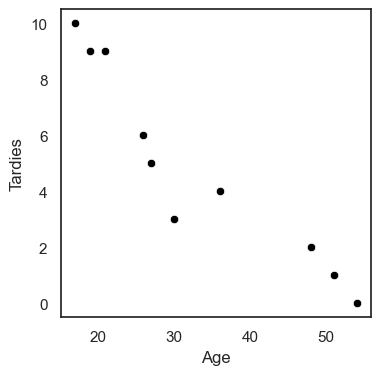

In [261]:
sns.scatterplot(data=student, x="Age", y="Tardies", color='black')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

#### there is a negative correlation between age and tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [196]:
student=student[["Age", "Tardies"]]

In [197]:
cov_matrix = student[['Age', 'Tardies']].cov()
cor_matrix = student[['Age', 'Tardies']].corr()
print("covariance")
print(cov_matrix)
print("covariance")
print(cor_matrix)

covariance
                Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
covariance
              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

Build a regression model step-by-step:

* Set the data: X (independ variables) and Y (depend variable - var to predict)
* Split the data: Train and Test
* Scale if necessary: RobustScaler, StandardScaler, Normalizer (by rows) ...
* Fit and predict - Eval different models 
* Get performance measures
* Select best model


In [198]:
# IMPORT THE CLASSES

from sklearn.linear_model import LinearRegression as LinReg   # alias es mio
from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2

# IMPORT EVAL METRICS - 
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2


In [199]:
indep_var="Tardies"
X = student.drop([indep_var], axis=1)
y = student[indep_var]

X.shape, y.shape

((10, 1), (10,))

In [200]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8, 1), (8,), (2, 1), (2,))

In [201]:
def linreg_models(X_train, X_test, y_train, y_test):

    '''
    Function to build 4 types of linear regression models
    INPUT: data variables divided by train/test of X and Y (indep and dep) variables, respectively
    OUTPUT: a summary dataframe with the model parameters and the most relevant performance metrics
    
    '''

    themodels = [LinReg() , Lasso(), Ridge(), ElasticNet()]
    models_sum=pd.DataFrame(columns=["rmse", "mae", "R2", "intercept", "coefs"])
    for i in range(len(themodels)):

        # init the model
        themodel = themodels[i]

        # fit / predict the model

        themodel.fit(X_train, y_train) # fit on the train
        y_pred_train = themodel.predict(X_train)  # predict on the test
        y_pred = themodel.predict(X_test)  # predict on the test
        # y_pred_total = linreg.predict(X)  # predict on the test


        # the fitted model will have the following parameters:

        themodel.intercept_
        #display(dict(zip(X_train.columns, linreg.coef_)))

        # concat the column name with its coeff (beta)
        result = [f"{key}: {value}" for key, value in list(zip(X_train.columns, themodel.coef_))]


        # the model predictions on the test set will return the following performance metrics:

        mse(y_train, y_pred_train, squared=False), mse(y_test, y_pred, squared=False) # rooted
        #mae(y_train, y_pred_train), mae(y_test, y_pred)
        #r2(y_train, y_pred_train), r2(y_test, y_pred)


        # save the data in a dict - to be imported to a table later
        sum_model_i={"rmse": mse(y_test, y_pred, squared=False),
                     "mae": mae(y_test, y_pred),
                     "R2": r2(y_test, y_pred), 
                    "intercept": themodel.intercept_, 
                     "coefs": result
                    }
        models_sum.loc[i]=sum_model_i

    models_sum.index = ["LinReg", "Lasso", "Ridge", "ElasticNet"]
    
    return models_sum

In [202]:
models_sum1=linreg_models(X_train, X_test, y_train, y_test)

In [203]:
#the best model according to RMSE
models_sum1.sort_values(by=["rmse"], ascending=True)

,rmse,mae,R2,intercept,coefs
Lasso,0.769264,0.760359,-1.367071,13.154696,[Age: -0.255524861878453]
ElasticNet,0.867652,0.860577,-2.011280,13.269231,[Age: -0.25961538461538464]
Ridge,1.027017,1.022069,-3.219054,13.453793,[Age: -0.26620689655172414]
LinReg,1.035929,1.031077,-3.292593,13.464088,[Age: -0.266574585635359]


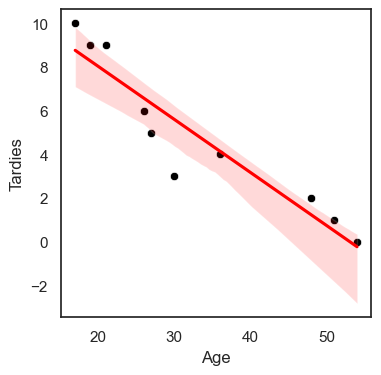

In [204]:
sns.scatterplot(data=student, x="Age", y="Tardies", color='black')
sns.regplot(data=student, x="Age", y="Tardies", scatter=False, color='red');  # Regression line


In [206]:
student2=student
student2["predicted_y"]=(student["Age"]* (-0.2665)) + 13.154696

In [207]:
student2

,Age,Tardies,predicted_y
0,17,10,8.624196
1,51,1,-0.436804
2,27,5,5.959196
3,21,9,7.558196
4,36,4,3.560696
5,48,2,0.362696
6,19,9,8.091196
7,26,6,6.225696
8,54,0,-1.236304
9,30,3,5.159696


Plot your regression model on your scatter plot.

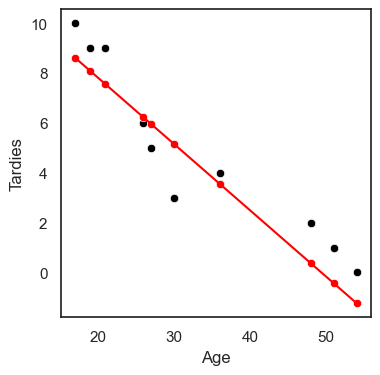

In [208]:
sns.scatterplot(data=student, x="Age", y="Tardies", color='black')
sns.scatterplot(data=student, x="Age", y="predicted_y", color='red')
sns.lineplot(data=student, x="Age", y="predicted_y", color='red');

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

**I think the model is quite good predicting the tardienes of the students based on their age. <br/>
However, we are working with a very small dataset, thus our conclusions are surely biased to the sample.**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [211]:
vehicles=pd.read_csv("vehicles.csv")
df=vehicles[["CO2 Emission Grams/Mile", "Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
df.sample(4)

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
4379,555.437500,1999,6.0,20.600625,16,2100
10457,592.466667,2003,8.0,21.974000,15,2200
17204,317.392857,1997,4.0,11.771786,28,1200
11790,634.785714,2003,8.0,23.543571,14,2400


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use **'CO2 Emission Grams/Mile' as our outcome** variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

* `Fuel Barrels/Year` has almost perfect correlation with `C02 emissions` thus this variable would almost perfectly predict the emissions <br/>
* `Year` of fabrication has the smallest correlation, thus would NOT be useful to predict the emissions

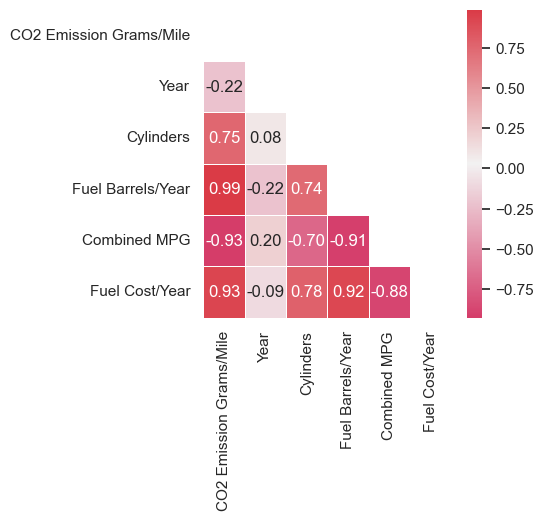

In [212]:
corrmat = df.corr()

sns.set(style='white')       # estilo blanco
mascara = np.triu(np.ones_like(corrmat, dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


plt.figure(figsize=(4, 4))
red_white_red_palette = sns.diverging_palette(240, 10, sep=20, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, mask=mascara  )
plt.show()

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [213]:
indep_var="CO2 Emission Grams/Mile"
X = df.drop([indep_var], axis=1)
y = df[indep_var]

X.shape, y.shape

((35952, 5), (35952,))

In [214]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28761, 5), (28761,), (7191, 5), (7191,))

In [238]:
models_sum2=linreg_models(X_train, X_test, y_train, y_test)
models_sum2=models_sum2.sort_values(by=["rmse"], ascending=True)
models_sum2

,rmse,mae,R2,intercept,coefs
Ridge,17.024297,7.449930,0.979454,755.724793,"[Year: -0.31560030967640773, Cylinders: 1.7940..."
LinReg,17.024328,7.449673,0.979454,755.693507,"[Year: -0.31558675458788704, Cylinders: 1.7940..."
Lasso,17.060614,7.678415,0.979367,721.724525,"[Year: -0.2989672818865957, Cylinders: 0.97729..."
ElasticNet,17.562042,10.622079,0.978136,1098.818618,"[Year: -0.46619561236604956, Cylinders: 1.5689..."


In [239]:
models_sum2["coefs"][0]

['Year: -0.31560030967640773',
 'Cylinders: 1.7940458721057968',
 'Fuel Barrels/Year: 19.23071686159154',
 'Combined MPG: -2.9336661019491856',
 'Fuel Cost/Year: 0.03197305678455106']

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

* The model that returned the **smallest RMSE was the ridge** model.
* **`Fuel Barrels/Year`** variable has the largest beta coeficient, thus it has the largest weight on predicting the CO2 emissions and so is the most important parameter.

* The **p-values for the coefficients** are retrieved in the next cell. 
According to my results, all the coefficients have statistical significance.
Nonetheless, some of these parameters have no information so I would not care about the p-value

**help(sm.OLS)**

    The fit() method in StatsModels is primarily used for fitting linear regression models without regularization.
    It fits an Ordinary Least Squares (OLS) regression model, which doesn't include any form of regularization like Lasso or Ridge.
    
**Thus, I am getting p-values from a different model (OLS) while I got the fitted model and its coefficients from Ridge model. ...** <br/> 

Nevertheless, I am getting very similar coefficients... <br/>
so I DON'T KNOW IF THIS IS CORRECT<br/> 



In [255]:
#StatsModels
import statsmodels.api as sm

# Convert X and y to a StatsModels compatible format
X_sm = sm.add_constant(X_train)  # Add a constant term for the intercept

# Fit Ridge regression model using StatsModels
sm_ridge_model = sm.OLS(y_train, X_sm).fit(alpha=1.0, L1_wt=0)  # L1_wt=0 for Ridge


sm_ridge_model.summary()

# Get p-values for coefficients
# p_values = sm_ridge_model.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.005e+05
Date:                     Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                             19:33:07   Log-Likelihood:            -1.2113e+05
No. Observations:                    28761   AIC:                         2.423e+05
Df Residuals:                        28755   BIC:                         2.423e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               755.6935     21.507     35.137      0.000     713.539     797.848
Year                 -0.3156      0.011    -29.360      0.000      -0.337      -0.295
Cylinders             1.7940      0.092     19.497      0.000       1.614       1.974
Fuel Barrels/Year    19.2310      0.068    281.981      0.000      19.097      19.365
Combined MPG         -2.9336      0.047    -62.750      0.000      -3.025      -2.842
Fuel Cost/Year        0.0320      0.001     59.724      0.000       0.031       0.033
==============================================================================
Omnibus:                    58182.680   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        238983414.038
Skew:                          16.711   Prob(JB):                         0.00
Kurtosis:                     448.315   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [256]:
models_sum2["coefs"][0]

['Year: -0.31560030967640773',
 'Cylinders: 1.7940458721057968',
 'Fuel Barrels/Year: 19.23071686159154',
 'Combined MPG: -2.9336661019491856',
 'Fuel Cost/Year: 0.03197305678455106']

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 